# Prerequisites
Before you can execute this notebook you'll need the graph logs which you can generate by running the `nervenet_graph_generation.py` in the `NerveNet` subfolder

In [55]:
import pandas as pd
import json
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

In [56]:

basepath = Path(os.getcwd())
# make sure your working directory is the repository root.
if basepath.name != "tum-adlr-ws21-04":
    os.chdir(basepath.parent.parent)
    
basepath = Path(os.getcwd())

In [57]:
graph_logs_dir = basepath / "logs_parser"
graph_logs_dir.exists(), graph_logs_dir

(True, WindowsPath('C:/Users/tsbau/git/tum-adlr-ws21-04/logs_parser'))

In [58]:
log_files = [x.name for x in graph_logs_dir.glob('*.json') if x.is_file()]
#log_files

In [59]:
#some settings
edge_colors = {
    10:"blue", # root-body
    3:"green", # body-body
    6:"blue", # joint-body
}

def visualize_task_graph(task_name:str, figsize=(10, 10)):
    with open(str(graph_logs_dir / f"{task_name}.json")) as json_file:
        task_log = json.load(json_file)
        
    
    node_colors = {
        "red": task_log["node_type_dict"]["root"],
        "blue": task_log["node_type_dict"]["joint"],
        "black": task_log["node_type_dict"]["body"],
    }

    node_names = {node["id"]: node["raw_name"] for node in task_log["tree"] if "raw_name" in node.keys()}
    node_names[0] = "root"
    
    # Generate graph structure
    G = nx.Graph()

    for i in range(task_log["num_nodes"]):
        G.add_node(i)
        for j in range(i, task_log["num_nodes"]):
            if task_log["relation_matrix"][i][j] != 0:
                G.add_edge(i, j)
                
    # plot the graph
    plt.figure(figsize=figsize)
    pos = nx.spring_layout(G)#, pos={0: np.array([ 0, 0])})

    options = {"node_size": 100, "alpha": 0.8}
    for color, nodes in node_colors.items():
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_color=color, **options)


    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)

    for p in pos:  # raise text positions
        pos[p][1] += 0.055
    nx.draw_networkx_labels(G, pos, node_names, font_size=12)

    #plt.axis("off")
    plt.show()
    
    return task_log

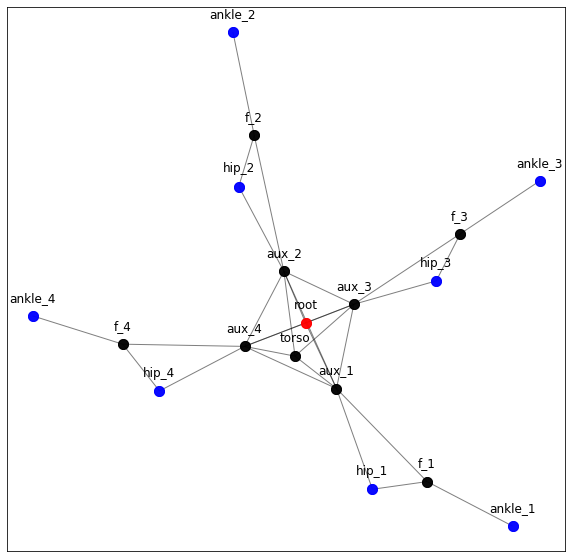

In [60]:
ant_log = visualize_task_graph("AntS-v1")

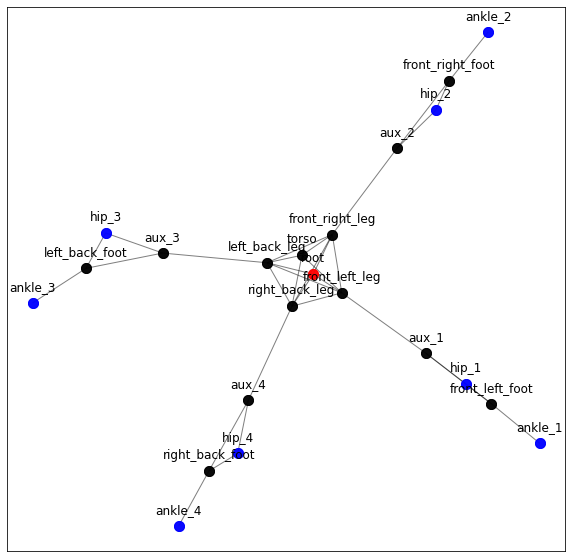

In [61]:
ant_bullet_log = visualize_task_graph("AntBulletEnv-v0")

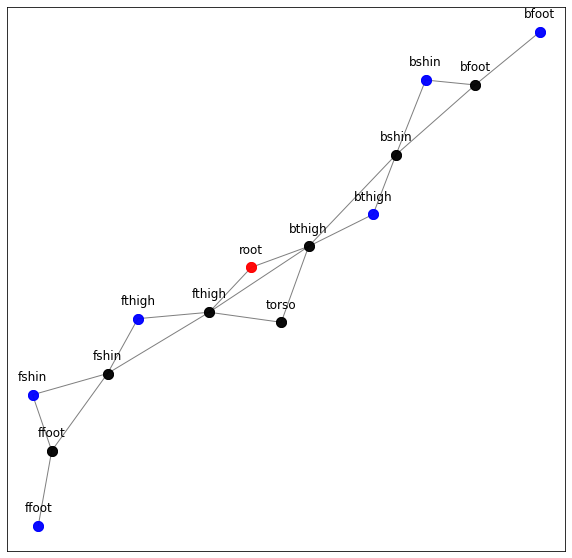

In [62]:
HalfCheetah_log = visualize_task_graph("HalfCheetah-v1")

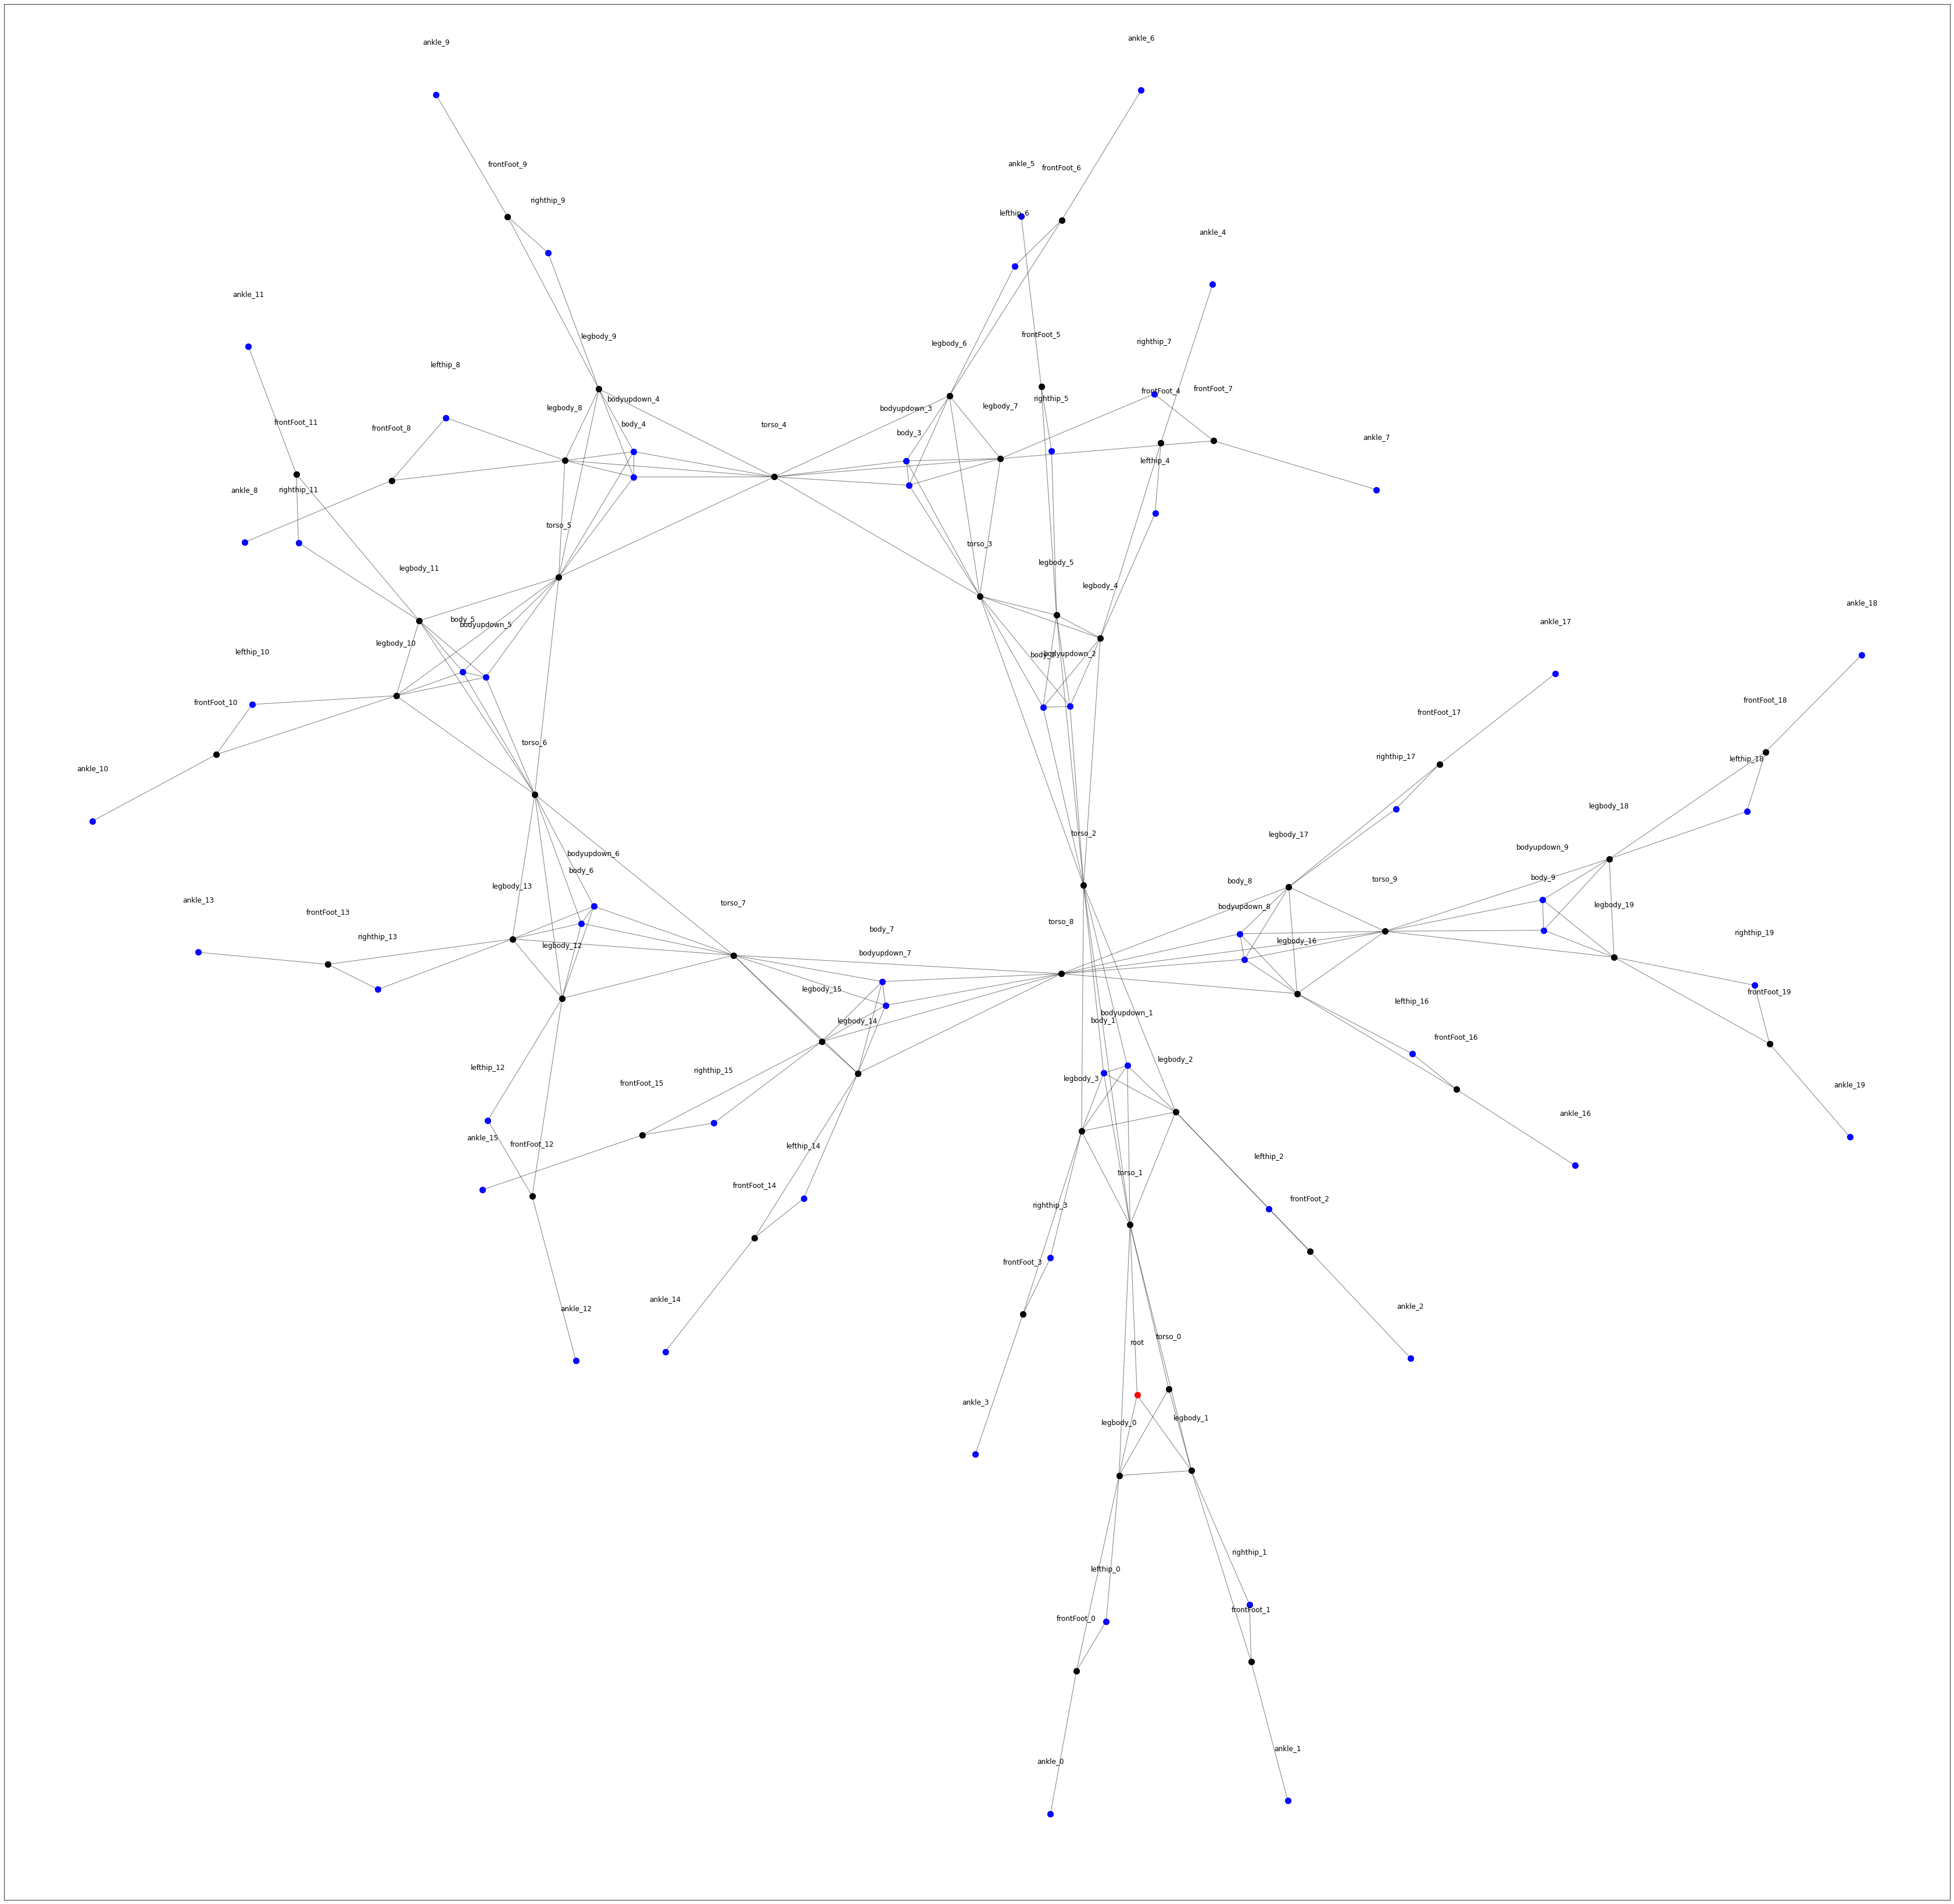

In [63]:
CentipedeFour_log = visualize_task_graph("CentipedeTwenty-v1", figsize=(60,60))

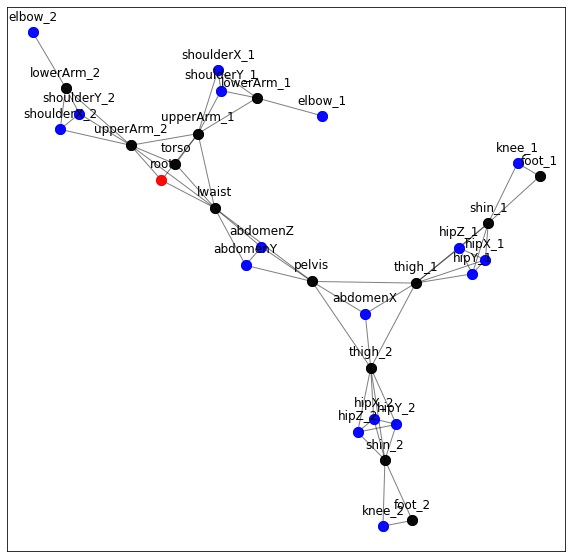

In [64]:
Humanoid_log = visualize_task_graph("Humanoid-v1")

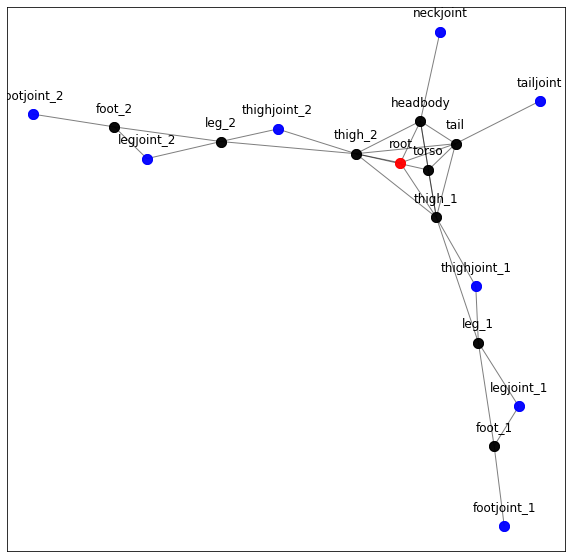

In [65]:
WalkersKangaroo_log = visualize_task_graph("WalkersKangaroo-v1")

In [ ]:
WalkersOstrich_log = visualize_task_graph("WalkersOstrich-v1")

In [ ]:
ant_bullet_log["node_type_dict"]

In [ ]:
ant_log["input_dict"]

In [ ]:
ant_log["num_nodes"]

In [ ]:
ant_log["relation_matrix"]

In [ ]:
ant_bullet_log.keys()

In [ ]:
ant_bullet_log["output_type_dict"]

In [ ]:
ant_bullet_log["output_list"]

In [ ]:
ant_bullet_log["obs_input_mapping"]

In [ ]:
ant_bullet_log["static_input_mapping"]

In [ ]:
ant_bullet_log["input_type_dict"]

In [ ]:
[node for node in ant_bullet_log["tree"] if node["id"] in ant_bullet_log["output_list"]]

In [ ]:
dict(enumerate([node for node in ant_bullet_log["tree"] if node["type"] == "joint"]))